# RTK Drone Testing

In [27]:
# import modules
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
from glob import glob
import warnings
from matplotlib import rcParams
warnings.filterwarnings('ignore')

# import matplotlib and set perameters.
%matplotlib inline
rcParams['figure.figsize'] = 10,6

## Import data

In [2]:
path = r"C:\Users\rmcgr\Rangeland_monitoring\rtk_testing"

df_list = []
for file in glob('{0}\\*.csv'.format(path)):
    print(file)
    df = pd.read_csv(file)
    df_list.append(df)

C:\Users\rmcgr\Rangeland_monitoring\rtk_testing\jenkins_measure.csv


In [3]:
data = pd.concat(df_list)

## Inspect data

In [4]:
# filter and rename feature
data.columns = ["location", "rectified", "altitude_m", "area_m2", "camera", "gcp", "distance_m", "resoloution"]
data = data[["location", "camera", "rectified", "altitude_m", "area_m2",  "gcp", "distance_m", "resoloution"]]

# visualise the data
data.head()

,location,camera,rectified,altitude_m,area_m2,gcp,distance_m,resoloution
0,jenkins11,hover,no_gcp,80,57790,jen11_01,0.946,0.04476
1,jenkins11,hover,no_gcp,80,57790,jen11_02,0.979,0.04476
2,jenkins11,hover,no_gcp,80,57790,jen11_03,0.903,0.04476
3,jenkins11,hover,no_gcp,80,57790,jen11_04,0.893,0.04476
4,jenkins11,hover,no_gcp,80,57790,jen11_05,0.938,0.04476


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568 entries, 0 to 567
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   location     568 non-null    object 
 1   camera       568 non-null    object 
 2   rectified    568 non-null    object 
 3   altitude_m   568 non-null    int64  
 4   area_m2      568 non-null    int64  
 5   gcp          568 non-null    object 
 6   distance_m   328 non-null    float64
 7   resoloution  568 non-null    float64
dtypes: float64(2), int64(2), object(4)
memory usage: 35.6+ KB


In [6]:
# Drop null values because gcp's have been used to calebrate point cloud.
data_no_null = data.dropna()

In [7]:
data_no_null.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 328 entries, 0 to 566
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   location     328 non-null    object 
 1   camera       328 non-null    object 
 2   rectified    328 non-null    object 
 3   altitude_m   328 non-null    int64  
 4   area_m2      328 non-null    int64  
 5   gcp          328 non-null    object 
 6   distance_m   328 non-null    float64
 7   resoloution  328 non-null    float64
dtypes: float64(2), int64(2), object(4)
memory usage: 23.1+ KB


## Basic statistics

In [8]:
# create a list of unique altitude values and sort into numerical order
alt_list = data_no_null.altitude_m.unique().tolist()
alt_list.sort()
# loop through list values
for i in alt_list:
    df= data_no_null[data_no_null['altitude_m']== i]
    print('='*70)
    print('Statistics for altitude {0}'.format(str(i)))
    print('-'*27)
    print(df.describe())

Statistics for altitude 50
---------------------------
       altitude_m       area_m2  distance_m  resoloution
count        87.0     87.000000   87.000000    87.000000
mean         50.0  32097.011494    2.985046     0.027564
std           0.0  11611.486506    0.819273     0.000580
min          50.0  24560.000000    0.848000     0.027190
25%          50.0  24560.000000    2.026000     0.027190
50%          50.0  24560.000000    3.335000     0.027190
75%          50.0  49780.000000    3.466500     0.028470
max          50.0  49780.000000    4.009000     0.028500
Statistics for altitude 80
---------------------------
       altitude_m       area_m2  distance_m  resoloution
count       161.0    161.000000  161.000000   161.000000
mean         80.0  38765.149068    2.034925     0.043970
std           0.0  12822.899066    1.207453     0.000567
min          80.0  29570.000000    0.884000     0.043410
25%          80.0  29570.000000    0.948000     0.043410
50%          80.0  31047.000000    

In [9]:
# seperate rectified column values and colculate the total number of gcp's to a list - then append to the dataframe
final_list = []

for i in data_no_null.rectified:
    if i != 'no_gcp':
        list_b = i.split(',')
        #print(list_b)
        value = len(list_b)
        #print(value)
        final_list.append(value)
        #print('_'*50)
    else:
        final_list.append(0)

        
data_no_null['gcp_count'] = final_list

In [10]:
# inspect data
data_no_null.sample(10)

,location,camera,rectified,altitude_m,area_m2,gcp,distance_m,resoloution,gcp_count
286,jenkins13,hover,"jen13_01, jen13_03",80,29570,jen13_test_01,3.494,0.04341,2
300,jenkins13,hover,"jen13_01, jen13_03, jen13_05",80,29570,jen13_04,3.993,0.04341,3
320,jenkins13,hover,"jen13_01, jen13_05, jen13_test_02",80,29570,jen13_test_03,3.367,0.04341,3
523,jenkins13,hover,"jen11_02, jen11_03, jen11_05",50,24560,jen13_01,3.283,0.02719,3
101,jenkins12,hover,jen12_03,100,34122,jen12_02,1.312,0.05472,1
402,jenkins11,hover,jen11_02,100,59278,jen11_05,0.929,0.05547,1
273,jenkins13,hover,jen13_test_1,80,29570,jen13_01,3.263,0.04341,1
463,jenkins11,hover,"jen11_04, jen11_05",50,49780,jen11_01,0.848,0.02813,2
266,jenkins13,hover,jen13_05,80,29570,jen13_02,3.312,0.04341,1
83,jenkins12,hover,no_gcp,100,34122,jen12_04,1.214,0.05468,0


In [11]:
# create two dataframes one with only no gcp's and one with only 1-n gsp's
print(data_no_null.shape)
no_gcp_df = data_no_null[data_no_null['rectified'] == 'no_gcp']
print(no_gcp_df.shape)
gcp_df = data_no_null[data_no_null['rectified'] != 'no_gcp']
print(gcp_df.shape)

(328, 9)
(31, 9)
(297, 9)


In [12]:
list_data = [no_gcp_df, gcp_df]
list_label = ["No Ground Control Points", "Ground Control Points"]

## Visualisation

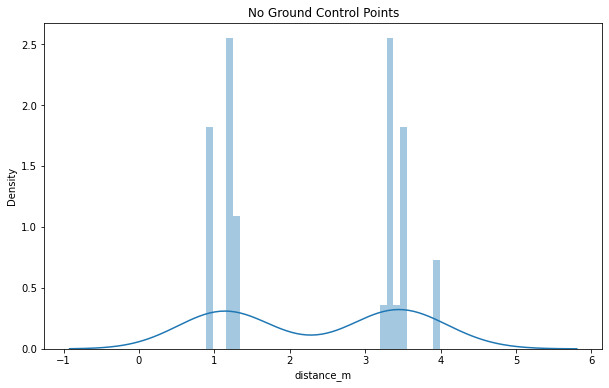

Skewness: -0.034955
Excess Kurtosis: -2.001302
Basic stats: 
Mean: 2.340548
Var: 1.442532
Std: 1.201055


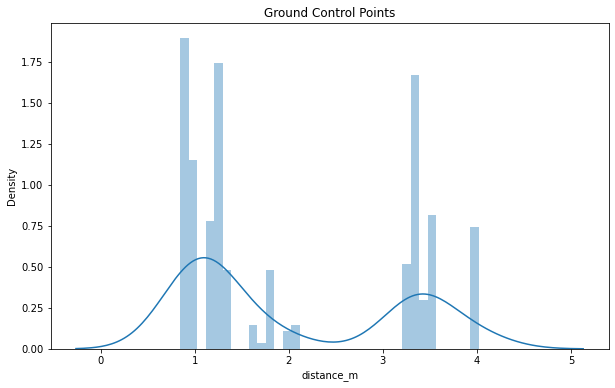

Skewness: 0.496906
Excess Kurtosis: -1.547702
Basic stats: 
Mean: 2.030717
Var: 1.333134
Std: 1.154614


In [28]:
for df, label in zip(list_data, list_label):
    sns.distplot(df.distance_m, bins = 35).set_title(label)
    plt.show()
    print('='*40)
    print("Skewness: %f" % df.distance_m.skew())
    print("Excess Kurtosis: %f" % df.distance_m.kurt())
    print('Basic stats: ')
    print("Mean: %f" % df.distance_m.mean())
    print("Var: %f" % df.distance_m.var())
    print("Std: %f" % df.distance_m.std())
    print('='*40)

    plt.show()

In [ ]:
for n in 

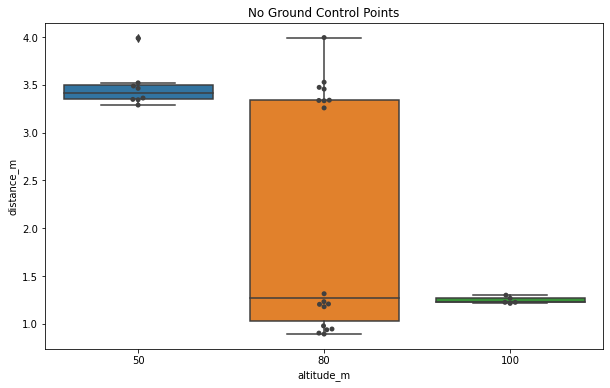

Number of observations per Altitude
                      count      mean       std    min    25%     50%  \
altitude_m gcp_count                                                    
50         0            8.0  3.475625  0.222728  3.289  3.347  3.4130   
80         0           18.0  2.140000  1.234467  0.893  1.029  1.2735   
100        0            5.0  1.246400  0.036418  1.214  1.225  1.2250   

                          75%    max  
altitude_m gcp_count                  
50         0          3.49625  3.989  
80         0          3.33925  3.995  
100        0          1.26800  1.300  


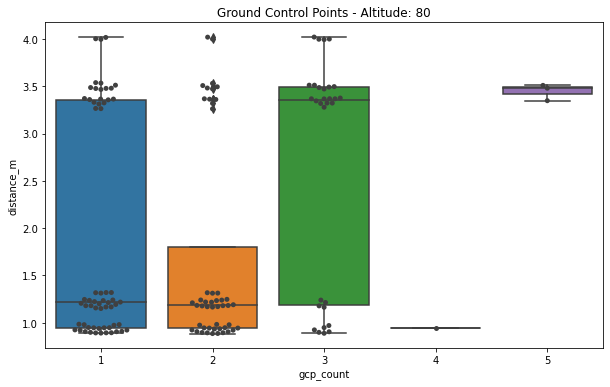

Number of observations per GCP count
           count      mean       std    min    25%     50%      75%    max
gcp_count                                                                 
1           61.0  1.906852  1.170912  0.889  0.948  1.2170  3.35600  4.016
2           48.0  1.683125  1.083241  0.884  0.942  1.1815  1.80225  4.019
3           30.0  2.690633  1.213954  0.887  1.186  3.3555  3.48975  4.020
4            1.0  0.941000       NaN  0.941  0.941  0.9410  0.94100  0.941
5            3.0  3.445000  0.086186  3.347  3.413  3.4790  3.49400  3.509


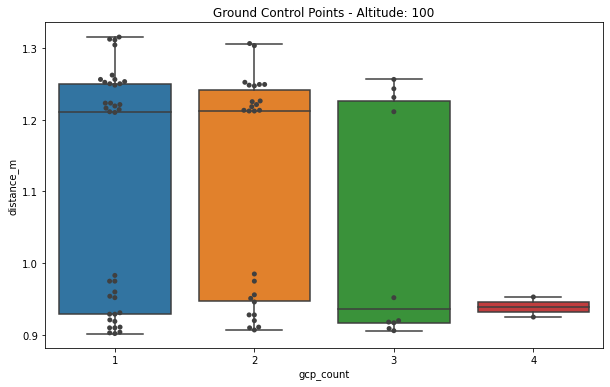

Number of observations per GCP count
           count      mean       std    min      25%     50%      75%    max
gcp_count                                                                   
1           37.0  1.104703  0.163189  0.902  0.92900  1.2110  1.25000  1.315
2           26.0  1.111962  0.154632  0.907  0.94725  1.2125  1.24175  1.306
3           10.0  1.046300  0.163457  0.906  0.91725  0.9360  1.22600  1.256
4            2.0  0.939000  0.019799  0.925  0.93200  0.9390  0.94600  0.953


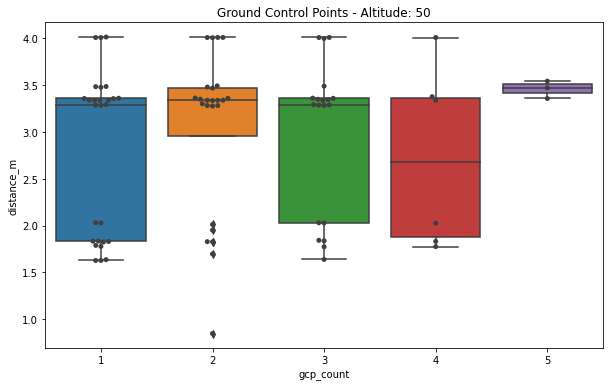

Number of observations per GCP count
           count      mean       std    min      25%     50%      75%    max
gcp_count                                                                   
1           27.0  2.798037  0.869192  1.627  1.83150  3.2880  3.35550  4.009
2           24.0  3.047333  0.858836  0.848  2.95825  3.3350  3.46775  4.005
3           19.0  2.974105  0.819877  1.638  2.02800  3.2880  3.35700  4.005
4            6.0  2.723667  0.961078  1.775  1.87950  2.6795  3.36325  4.004
5            3.0  3.453667  0.093329  3.354  3.41100  3.4680  3.50350  3.539


In [43]:
n = 0

for df_, label in zip(list_data, list_label):
    # create a list of unique altitude values and sort into numerical order
    alt_list = df_.altitude_m.unique().tolist()
    alt_list.sort()
    # loop through list values
    if n == 0:
        sns.boxplot(x='altitude_m', y='distance_m', data=df_).set_title(label)
        sns.swarmplot(x='altitude_m', y='distance_m', data=df_, color=".25")
        plt.show()
        print('='*80)
        print('Number of observations per Altitude')
        # print(df_.altitude_m.value_counts())
        print(df_.groupby(['altitude_m', 'gcp_count'])['distance_m'].describe())
        print('='*80)
    else:
        for alt in df_.altitude_m.unique():
            alt_df = df_[df_['altitude_m']== alt]
            sns.boxplot(x='gcp_count', y='distance_m', data=alt_df).set_title('{0} - Altitude: {1}'.format(label, alt))
            sns.swarmplot(x='gcp_count', y='distance_m', data=alt_df,color=".25")
            plt.show()
            print('='*80)
            print('Number of observations per GCP count')
            #print(alt_df.gcp_count.value_counts())
            print(alt_df.groupby(['gcp_count'])['distance_m'].describe())
            print('='*80)
        
    n += 1


In [30]:
n = 0

for df_, label in zip(list_data, list_label):
    # create a list of unique altitude values and sort into numerical order
    alt_list = df_.altitude_m.unique().tolist()
    alt_list.sort()
    # loop through list values
        
        
    for i in alt_list:
        if n == 0:
            df= df_[df_['altitude_m']== i]
            print('='*70)
            print('Data source: {0}'.format(label))
            print('Statistics for altitude {0}'.format(str(i)))
            print('-'*27)
            print(df.distance_m.describe())
            
        else:
            for count in df_.gcp_count.unique():
                print('GCP count: ', count)
                print('-'*15)
                df_count = df_[df_['gcp_count'] == count]
                df= df_count[df_count['altitude_m']== i]
                print('='*70)
                print('Data source: {0} - GCP count: {1}'.format(label, str(count)))
                print('Statistics for altitude {0}'.format(str(i)))
                print('-'*27)
                           
                print(df.distance_m.describe())
    n += 1
    print(n)

Data source: No Ground Control Points
Statistics for altitude 50
---------------------------
count    8.000000
mean     3.475625
std      0.222728
min      3.289000
25%      3.347000
50%      3.413000
75%      3.496250
max      3.989000
Name: distance_m, dtype: float64
Data source: No Ground Control Points
Statistics for altitude 80
---------------------------
count    18.000000
mean      2.140000
std       1.234467
min       0.893000
25%       1.029000
50%       1.273500
75%       3.339250
max       3.995000
Name: distance_m, dtype: float64
Data source: No Ground Control Points
Statistics for altitude 100
---------------------------
count    5.000000
mean     1.246400
std      0.036418
min      1.214000
25%      1.225000
50%      1.225000
75%      1.268000
max      1.300000
Name: distance_m, dtype: float64
1
GCP count:  1
---------------
Data source: Ground Control Points - GCP count: 1
Statistics for altitude 50
---------------------------
count    27.000000
mean      2.798037
std   

In [19]:
#sns.pairplot(data=data)

,altitude_m,area_m2,distance_m,resoloution
altitude_m,1.000000,0.366920,-0.573801,0.998617
area_m2,0.366920,1.000000,-0.712885,0.413425
distance_m,-0.573801,-0.712885,1.000000,-0.609246
resoloution,0.998617,0.413425,-0.609246,1.000000


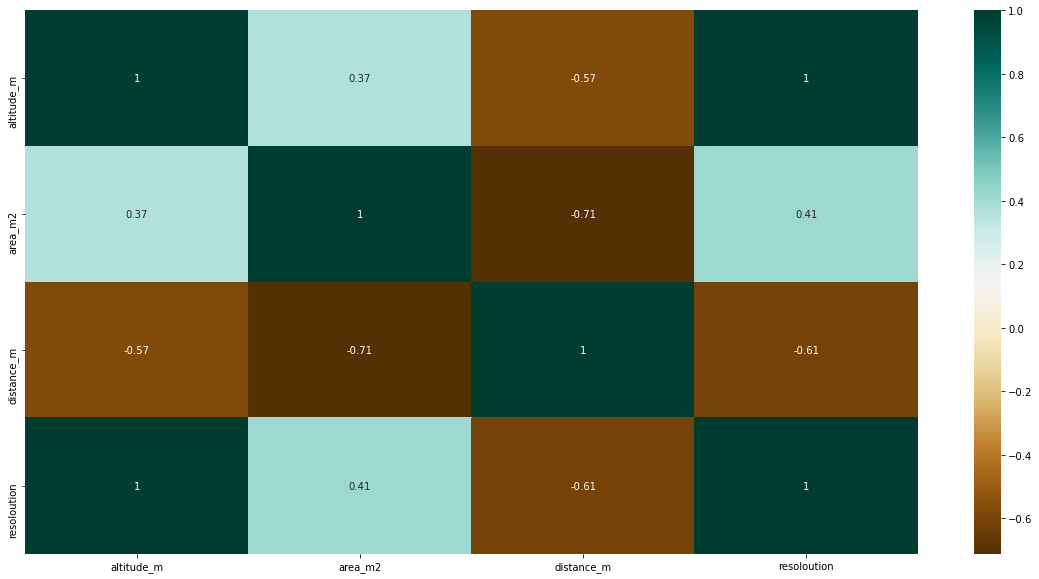

In [32]:
# Finding the relations between the variables.
plt.figure(figsize=(20,10))
c= data.corr()
sns.heatmap(c,cmap="BrBG",annot=True)
c

In [35]:
no_gcp_df.groupby(['altitude_m', 'gcp_count'])['distance_m'].describe()

,,count,mean,std,min,25%,50%,75%,max
altitude_m,gcp_count,,,,,,,,
50,0,8.0,3.475625,0.222728,3.289,3.347,3.4130,3.49625,3.989
80,0,18.0,2.140000,1.234467,0.893,1.029,1.2735,3.33925,3.995
100,0,5.0,1.246400,0.036418,1.214,1.225,1.2250,1.26800,1.300
